In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data=pd.read_csv('dataset.csv')#model dataset

In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'headline', 'followers', 'about',
       'time_spent', 'content', 'content_links', 'media_urls', 'num_hashtags',
       'hashtag_followers', 'hashtags', 'reactions', 'comments', 't_factor',
       'num_links', 'contlen', 'info', 'relevance_score_2', 'relevance_score',
       'Impressions', 'Reach', 'article', 'document', 'image', 'poll', 'text',
       'video', 'achievement', 'call to action', 'info.1', 'insights',
       'job opening', 'other', 'conf2'],
      dtype='object')

In [81]:
# impressions=[]
# engagement=[]

# for i in range(data.shape[0]):
#     imp=((data['followers'][i]*(1/50))+(data['reactions'][i]*30)+(data['comments'][i]*50))/(data['t_factor'][i])
#     impressions.append(imp)
#     eng=(data['reactions'][i]+(data['comments'][i]*2))/(imp)
#     engagement.append(eng)
    
# data['impressions']=pd.Series(np.array(impressions))
# data['reach']=pd.Series(np.array(engagement))

In [12]:
x_col = [ 'followers', 'article', 'document', 'image', 'poll', 'text', 'video', 'achievement', 'call to action', 
         'insights', 'job opening', 'other', 'num_hashtags', 'num_links', 'contlen', 'conf2', 'relevance_score']
y_col = ['Reach']

In [13]:
X = data[x_col]
y = data[y_col]

In [14]:
X.rename({"conf2":"conf"},axis=1,inplace=True)

C:\Users\shrey\anaconda3\envs\webscrape\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
X

,followers,article,document,image,poll,text,video,achievement,call to action,insights,job opening,other,num_hashtags,num_links,contlen,conf,relevance_score
0,3597845,0,0,0,0,0,1,0,0,1,0,0,2,3,327,0.286051,0.750146
1,3597845,0,0,1,0,0,0,0,1,0,0,0,1,3,260,0.182609,0.840049
2,3597845,0,0,1,0,0,0,0,0,1,0,0,2,2,367,0.322148,0.798681
3,3597845,0,0,0,0,0,1,0,0,1,0,0,0,0,124,0.326315,0.714232
4,3597845,0,0,0,0,0,1,0,0,1,0,0,3,4,331,0.358376,0.897814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55140,4206024,0,0,1,0,0,0,1,0,0,0,0,0,0,840,0.356085,0.966612
55141,4206024,0,0,0,0,0,1,0,1,0,0,0,0,0,144,0.179531,0.885406
55142,4206024,0,0,0,0,0,1,0,0,1,0,0,0,0,555,0.290362,0.947600
55143,4206024,0,0,0,0,0,1,0,0,0,1,0,0,0,106,0.345141,0.928953


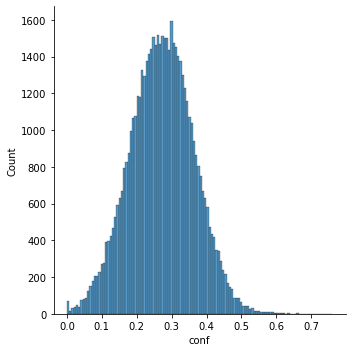

In [129]:
sns.displot(X.conf)

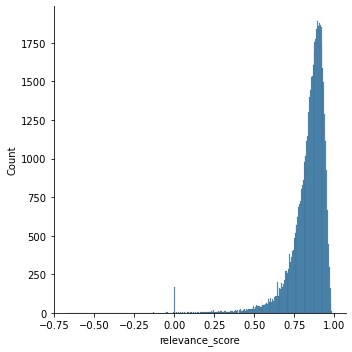

In [130]:
sns.displot(X.relevance_score)

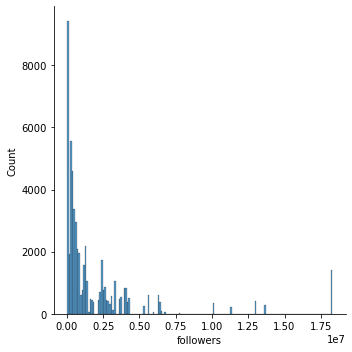

In [131]:
sns.displot(X.followers)

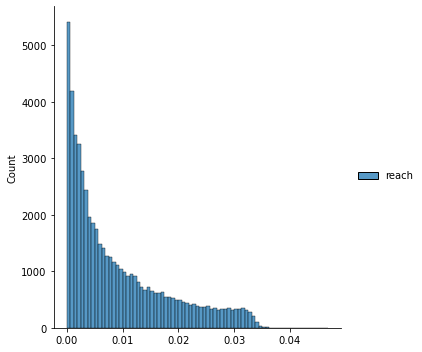

In [132]:
sns.displot(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression()
# reg.fit(X_train, y_train)
# y_pred=reg.predict(X_test)
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)

6.896427433546107e-05

In [19]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

<ipython-input-19-c7e4e1734ff3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


2.6456409824549028e-05

In [20]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [21]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [22]:
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\shrey\anaconda3\envs\webscrape\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [23]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators= 2000,
 min_samples_split=10,
 min_samples_leaf= 2,
 max_features='auto',
 max_depth= 40,
 bootstrap= True,random_state=1)#final_model
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

<ipython-input-23-d89b46f37bc1>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


2.569306978239705e-05